# Soft Computing - rač. vežba 3

## K-means algoritam
Cilj ovih vežbi jeste implementacija K-means algoritma za grupisanje i njegova primena u OCR-u, kroz Scikit-learn biblioteku.
* Scikit-learn - biblioteka za mašinsko učenje u Python-u (http://scikit-learn.org/stable/)

### Algoritam
Pomoću K-Means algoritma moguće je izvršiti podelu prostora na k grupa, gde je svaka od njih određena svojom centralnom tačkom. Svrstavanje nekog elementa u jednu od grupa se svodi na određivanje njemu najbižeg centra, po Euklidskom rastojanju.
<img src="images/plot_kmeans.png"></img>
#### Ulazni parametri algoritma
Za rad K-Means algoritma neophodno je poznavati broj grupa u napred.

#### Pseudo-kod
```code
za svaku grupu inicijalizovati nasumično centar
dok se centri ne prestanu kretati za predodređeni minimum ili ne dostigne predodređeni broj iteracija radi:
    pridruži svaki element iz skupa grupi sa njemu najbližim centrom
    pomeri centar svih grupa na osnovu novih elemenata
```

In [1]:
#import potrebnih biblioteka za K-means algoritam
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

#Sklearn biblioteka sa implementiranim K-means algoritmom
from sklearn import datasets
from sklearn.cluster import KMeans
iris = datasets.load_iris() #Iris dataset koji će se koristiti kao primer https://en.wikipedia.org/wiki/Iris_flower_data_set

###Pomoćna funkcija za ispis
Funkcija će biti korišćena kako bi se prikazala konvergencija K-means algoritma kroz svaku iteraciju.

In [2]:
def display_progress(data, centers, labels):
    '''
    Funkcija služi za debagovanje postupka pomeranja grupa
    '''
    colors = iter(plt.cm.gist_rainbow(np.linspace(0,1,len(centers)))) #formira se iterabilna lista od n različitih boja
    for idx, center in enumerate(centers):
        center_group = data[np.where(labels == idx)] #niz tačaka koje pripadaju grupi određenoj centrom 'center'
        color = next(colors) #uzima se boja za svaku grupu
        plt.scatter(center_group[:,0],center_group[:,1], c=color, marker='o', s=50) #iscrtavanje tačaka u grupi
        plt.scatter(center[0],center[1], c=color, marker='x', s=200) #iscrtavanje centara
    plt.show()

#TODO 1
Implementirati funkciju koja vraća dve nasumično odabrane tačke iz niza.

In [3]:
# TODO 1

# eksplicitnim postavljanjem seed-a za random vrednosti, možemo da kontrolišemo rešenje algoritma (i testa)
np.random.seed(6);

def init_centers(data, n_clusters):
    '''
    Funkcija vraća niz od 'n_clusters' tačaka koje su nasumično odabrane.
    Args:
        data: niz tačaka koje se klasifikuju.
        n_clusters: broj grupa na koje se podaci klasifikuju.
    Return:
        niz tačaka koji određuju centre grupa.
    '''
    centers = []
    for _ in range(0, n_clusters):
        rnd_idx = np.random.randint(0, len(data))
        centers.append(data[rnd_idx])
    return np.array(centers)

# TODO 1 test
todo_1_data = range(10)
todo_1_result = init_centers(todo_1_data, 2)
todo_1_ref = np.array([9, 3])
print 'TODO 1 test passed:', np.array_equal(todo_1_result, todo_1_ref)

TODO 1 test passed: True


#TODO 2
Implementirati funkciju koja računa euklidsko rastojanje između dve tačke. Ova funkcija će biti upotrebljena kako bi se odredio pomeraj centara grupa iz iteracije u iteraciju, kao i pripadnost neke tačke određenoj grupi.

In [4]:
# TODO 2
def get_distance(pt1, pt2):
    '''
    Funkcija implementira izračunavanje rastojanja između dve tačke
    Args:
        pt1, pt2: vektori koji određuju koordinate tačaka
    Return:
        rastojanje između tačaka
    '''
    return distance.euclidean(pt1, pt2)

# TODO 2 test
todo_2_pt1, todo_2_pt2 = [0, 0], [3, 4]
todo_2_result = get_distance(todo_2_pt1, todo_2_pt2)
todo_2_ref = 5
print 'TODO 2 test passed:', todo_2_result == todo_2_ref

TODO 2 test passed: True


#TODO 3
Implementirati funkciju koja vraća pripadnost prosleđenih tačaka grupama. Ovo je glavna funkcija koja će se koristiti nakon što se centri grupa odrede, ali igra ulogu i tokom same konvergencije K-means algoritma.

In [5]:
# TODO 3
def predict(data, centers):
    '''
    Funkcija implementira predikciju pripadnusti svake tačke iz niza 'data', za grupe
    koje su određene centrima iz niza 'centers'
    Args:
        data: niz tačaka koje treba klasifikovati
        centers: kalkulisani centri grupa
    Return:
        Niz čiji elementi sadrže indeks grupe kojoj element na toj poziciji odgovara
    Primer:
        data = [[1,1], [2,2], [3,3]]
        centers = [[1,1], [4,4]]
        ret_val = [0, 0, 1]
    '''
    ret_val = []
    for point in data:
        # Pronaći udaljenost trenutne tačke od svakog centra i zapamtiti vrednost
        # Odrediti minimalnu takvu udaljenost i dodati indeks tog centra u ret_val
        center_distance = []
        for center in centers:
            center_distance.append(get_distance(point, center))
        
        minimum = min(enumerate(center_distance), key=lambda x: x[1])[0]
        ret_val.append(minimum)
    return np.array(ret_val)

# TODO 3 test
todo_3_data = np.array([[1,1], [2,2], [3,3]], np.float32)
todo_3_centers = np.array([[1,1], [4,4]], np.float32)
todo_3_result = predict(todo_3_data, todo_3_centers)
todo_3_ref = np.array([0,0,1])
print 'TODO 3 test passed:', np.array_equal(todo_3_result, todo_3_ref)

TODO 3 test passed: True


#TODO 4
Implementirati funkciju koja koristi podatke o pripadnosti grupama određenih tačaka, dobijeni iz funkcije predict, i izračunava nove centre kao srednje tačke određenih grupa.

In [6]:
# TODO 4
def shift_centers(data, centers, labels):
    '''
    Funkcija implementira pomeranje prosleđenih centara grupa u odnosu na trenutnu pripadnost
    tačaka, opisanu kroz niz labels.
    Args:
        data: niz tačaka koje se klasifikuju
        centers: niz tačaka koje određuju trenutne centre
        labels: niz koji određuje pripadnost tačaka iz 'data', predstavlja vrednost koja se dobije iz 'predict'
            funkcije iz prethodnog zadatka.
    Return:
        (np.array, float) Funkcija treba da vrati izračunate nove centre na osnovu vrednosti koje pripadaju grupi,
            i ukupno rastojanje za koje su se centri pomerili
    '''
    ret_val = [] # niz koji treba da sadrži nove centre
    total_shift = 0 # ukupan pomeraj svih centara, odnosno suma rastojanja između starih i novih tačaka
    for idx, center in enumerate(centers):
        # Pronaći sve indekse elementata iz 'labels' čija je vrednost jednaka indeksu centra u trenutnoj iteraciji.
        # Na primer labels: [0, 0, 1, 2, 0] za centar na poziciji 0, vraća niz [0, 1, 4]
        # Iskoristiti novi niz kako bi se izvukli elementi iz data. data[0, 1, 4] će vratiti upravo te članove
        cluster_data = data[(labels == idx).nonzero()]
        if len(cluster_data) > 0:
            new_center = np.mean(cluster_data, axis=0)
        else:
            new_center = center
            
        ret_val.append(new_center)
        total_shift += get_distance(new_center, center)
        # U slučaju da postoje tačke koje pripadaju grupi sa centrom iz trenutne iteracije, odrediti
        # novi centar kao srednju tačku svih tačaka grupe.
        # Ako centar nema tačaka, on se neće pomeriti.
            
        # Dodati novi centar u ret_val
        # Modifikovati total_shift za vrednost pomeraja (euklidsko rastojanje izmedju novog i starog centra)
    
    return np.array(ret_val), total_shift

todo_4_data = np.array([[1,1], [2,2], [3,3]], np.float32)
todo_4_centers = np.array([[1,1], [4,4]], np.float32)
todo_4_labels = np.array([0, 0, 1])
todo_4_new_centers, todo_4_shift = shift_centers(todo_4_data, todo_4_centers, todo_4_labels)
print 'TODO 4 test passed (new centers):', np.array_equal(todo_4_new_centers, [[1.5, 1.5], [3, 3]])
print 'TODO 4 test passed (total shift):', np.round(todo_4_shift,2) == 2.12

TODO 4 test passed (new centers): True
TODO 4 test passed (total shift): True


#TODO 5
Implementirati glavnu petlju algoritma.

In [7]:
# TODO 5
def fit_clusters(data, n_clusters, tolerance, max_iter, verbose = False):
    '''
    Funkcija treba da implementira glavnu petlju koja formira grupe.
    Args:
        data: niz koje je potrebno klasifikovati.
        n_clusters: broj grupa na koje se prostor deli.
        tolerance: uslov prekida algoritma koji se upoređuje sa ukupnim pomerajem centara iz iteracije
            u iteraciju.
        max_iter: drugi uslov prekida algoritma koji određuje maksimalni broj iteracija.
        verbose: određuje da li će se prikazivati grafici trenutnog stanja u svakoj iteraciji.
    Return:
        Povratna vrednost predstavlja niz od 'n_clusters' tačaka koje odgovaraju centrima grupa.
    '''
    # nasumično inicijalizovati početne centre grupa (TODO 1)
    centers = init_centers(data, n_clusters)
    data = np.array(data, np.float32)

    for iteration in range(0, max_iter):
        # Razvrstati tačke u grupe određene trenutnim centrima (TODO 3)
        labels = predict(data, centers)
        # Izračunati nove centre grupa kao i njihov pomeraj, i postaviti ih u promenljive new_centersi shift. (TODO 4)
        new_centers, total_shift = shift_centers(data, centers, labels)
        
        if (verbose):
            print 'Iteration:', iteration+1, '\nMean shift:', total_shift
            display_progress(data, centers, labels)
        centers = new_centers
        
        # Implementirati uslov prekida na osnovu parametra tolerance i ukupne vrednosti pomeraja centara
        # u trenutnoj iteraciji (ako je ukupni pomeraj centara manji od zadatog parametra tolerance -> prekinuti)
        if (tolerance > total_shift):
            break;
        
    return centers

#Primer na <i>Iris</i> dataset-u
Na slici su prikazane stvarne vrednosti parametara za sve tri klase <i>Iris</i> cveta. Iscrtani grafici predstavljaju prikaze u odnosu na po dve osobine cveta.
<img src="images/Anderson's_Iris_data_set.png" height="70%" width="70%"></img>

#Start
Prvo se određuju centri, zatim se nad tim centrima može izvršiti predikcija za neku drugu tačku.

Iteration: 1 
Mean shift: 2.61822333515


/home/student/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


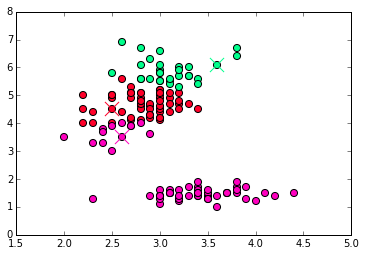

Iteration: 2 
Mean shift: 0.662988521159


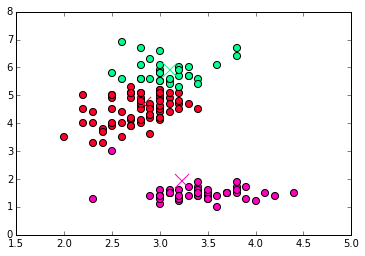

Iteration: 3 
Mean shift: 0.152061920613


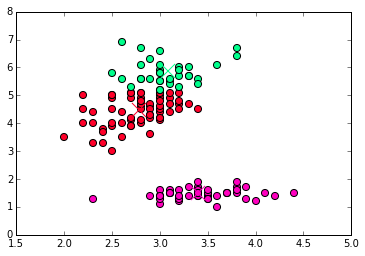

Iteration: 4 
Mean shift: 0.064625384286


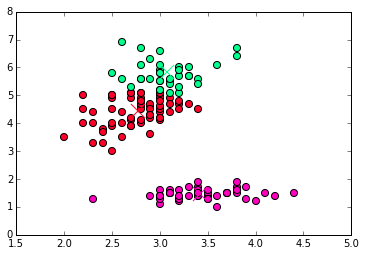

Iteration: 5 
Mean shift: 0.0302472999319


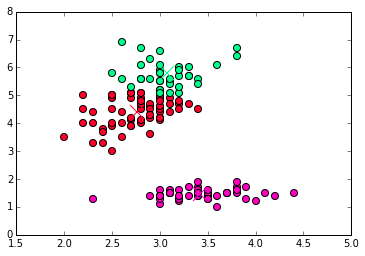

Iteration: 6 
Mean shift: 0.0


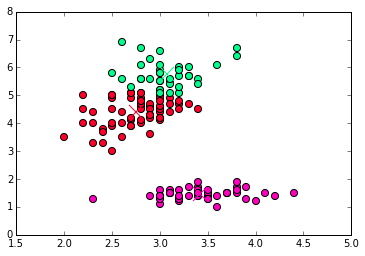

Centri: [[ 2.75396824  4.4000001 ]
 [ 3.07297301  5.76756763]
 [ 3.41800022  1.46399999]]
Grupa za tacku [1,4]: [0]


In [8]:
data = iris.data[:,1:3] #Odgovara Sepal.Width i Petal.Length osobinama
calculated_centers = fit_clusters(data, 3, 0.00001, 5000, True)
print 'Centri:', calculated_centers

print 'Grupa za tacku [1,4]:',predict([[1,4]], calculated_centers)

#Scikit-learn K-Means implementacija
Pomenuta scikit-learn biblioteka sadrži već implementiran K-Means algoritam koji ćemo koristiti u buduće.

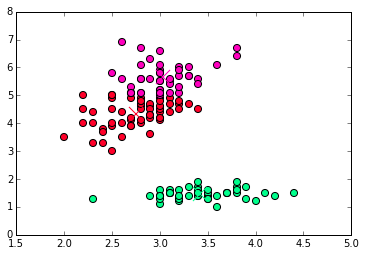

[[ 2.75087719  4.32807018]
 [ 3.418       1.464     ]
 [ 3.03255814  5.67209302]]


In [9]:
k_means = KMeans(n_clusters=3, max_iter=5000, init='random', tol=0.00001, n_init=10)
k_means.fit(data)
display_progress(data, k_means.cluster_centers_, k_means.labels_)
print k_means.cluster_centers_


#Primena u OCR-u
Do sada je rađeno optičko prepoznavanje brojeva i matematičkih izraza. Kada je reč o čitanju stvarnog teksta, deo problema predstavlja i određivanje granica između reči i redova u tekstu. Kao rešenje moguće je koristiti K-means algoritam i klasifikovati razmak između regiona na dve grupe:
* Razmak između slova u reči
* Razmak između reči

In [10]:
#import potrebnih biblioteka
import cv2
import collections

# keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12 # za prikaz većih slika i plotova, zakomentarisati ako nije potrebno

In [11]:
#Funkcionalnost implementirana u V1
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def image_bin(image_gs):
    ret,image_bin = cv2.threshold(image_gs, 127, 255, cv2.THRESH_BINARY)
    return image_bin
def invert(image):
    return 255-image
def display_image(image, color= False):
    if color:
        plt.imshow(image)
    else:
        plt.imshow(image, 'gray')
def dilate(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.dilate(image, kernel, iterations=1)
def erode(image):
    kernel = np.ones((3,3)) # strukturni element 3x3 blok
    return cv2.erode(image, kernel, iterations=1)

#Funkcionalnost implementirana u V2
def resize_region(region):
    resized = cv2.resize(region,(28,28), interpolation = cv2.INTER_NEAREST)
    return resized
def scale_to_range(image):
    return image / 255
def matrix_to_vector(image):
    return image.flatten()
def prepare_for_ann(regions):
    ready_for_ann = []
    for region in regions:
        ready_for_ann.append(matrix_to_vector(scale_to_range(region)))
    return ready_for_ann
def convert_output(outputs):
    return np.eye(len(outputs))
def winner(output):
    return max(enumerate(output), key=lambda x: x[1])[0]

#TODO 6
Modifikovati funkciju za određivanje regija od interesa, tako da vraća i vrednosti rastojanja po x osi, između svih regiona.

In [14]:
# TODO 6
def select_roi(image_orig, image_bin):
    '''
    Funkcija kao u vežbi 2, iscrtava pravougaonike na originalnoj slici, pronalazi sortiran niz regiona sa slike,
    i dodatno treba da sačuva rastojanja između susednih regiona.
    '''
    img, contours, hierarchy = cv2.findContours(image_bin.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Način određivanja kontura je promenjen na spoljašnje konture: cv2.RETR_EXTERNAL
    #regions_dict = {}
    regions_not_dict = []
    for contour in contours: 
        x,y,w,h = cv2.boundingRect(contour)
        region = image_bin[y:y+h+1,x:x+w+1];
        # Proširiti regions_dict elemente sa vrednostima boundingRect-a ili samim konturama
        #regions_dict[x+y] = [resize_region(region), (x,y,w,h)]
        regions_not_dict.append((y,x,w,h, resize_region(region))) #ubacujemo u listu setova, prvi element seta je y, da bi razlikovali redove
        cv2.rectangle(image_orig,(x,y),(x+w,y+h),(0,255,0),2)

    #sorted_regions_dict = collections.OrderedDict(sorted(regions_dict.items()))
    #sorted_regions = np.array(sorted_regions_dict.values())
    
    sorted_regions_not_dict = sorted(regions_not_dict) #sortiramo po redovima (y vrednost), slova unutar reda nece biti pravilno sortirana
    #print sorted_regions_not_dict
    prev_y = 0
    #y vrednosti jednog reda ce se razlikovati za neke male vrednosti, namestimo ih sve na jednu y vrednost radi pravilnog sortiranja slova unutar reda
    sorted_regions_new_nodict = sorted_regions_not_dict
    for idx, region in enumerate(sorted_regions_not_dict):
        y = region[0]
        if(y != prev_y):
            if(y-10 <= prev_y <= y+10): #ako je trenutno y po vrednosti slicno prethodnom, isti je red
                sorted_regions_new_nodict[idx] = (prev_y, sorted_regions_not_dict[idx][1], sorted_regions_not_dict[idx][2], sorted_regions_not_dict[idx][3], sorted_regions_not_dict[idx][4])
            else:
                prev_y = y
    sorted_regions_not_dict = sorted(sorted_regions_new_nodict) #novo sortiranje, sad ce slova u redu biti pravilnim redosledom
    #print sorted_regions_not_dict[:][0:2]
    
    distances_not_dict = [-sorted_regions_not_dict[0][1]-sorted_regions_not_dict[0][2]] #prvi element (razdaljina) -x-w
    #print 'r0 ', sorted_regions_not_dict[0]
    #print 'x0 ', sorted_regions_not_dict[0][1]
    #print 'w0 ', sorted_regions_not_dict[0][2]
    #print 'x1 ', sorted_regions_not_dict[1][1]
    #print sorted_regions_not_dict[1:-1][:]
    for region in sorted_regions_not_dict[1:-1][:]: #racunanje rastojanja svih susednih regiona po x osi
        #na ovaj nacin, dobicemo na kraju reda negativno rastojanje (rastojanje po x osi za poslednje slovo prvog reda i prvo slovo drugog reda) dok god ima jos redova posle trenutnog
        distances_not_dict[-1] += region[1] #dodajemo x vrednost na prethdoni element
        #print 'x ', region[1], ' w ', region[2]
        distances_not_dict.append(-region[1]-region[2]) #novi element -x-w
    distances_not_dict[-1] += sorted_regions_not_dict[-1][1]
        
    sorted_regions_only = []
    for region in sorted_regions_not_dict:
        sorted_regions_only.append(region[4])
    
    #sorted_rectangles = sorted_regions[:,1]
    #print 'REGIONS: ', sorted_regions
    #print 'RECTANGLES: ', sorted_rectangles
    #region_distances = [[-sorted_rectangles[0][0]-sorted_rectangles[0][2], -sorted_rectangles[0][0]-sorted_rectangles[2][0]]]
    # Izdvojiti sortirane parametre opisujućih pravougaonika
    # Izračunati rastojanja između svih susednih regiona po x osi i dodati ih u region_distances niz
    #for x,y,w,h in sorted_regions[1:-1, 1]:
        #print -x, ' ', region_distances[-1]+x
        #region_distances[-1][0] += y
        #region_distances[-1][1] += x
        #region_distances.append([-y-h, -x-w])
    #region_distances[-1][0] += sorted_rectangles[-1][1]
    #region_distances[-1][1] += sorted_rectangles[-1][0]
    
    #return image_orig, sorted_regions[:, 0], region_distances
    return image_orig, sorted_regions_only, distances_not_dict

#TODO 7
U odnosu na alfabet prikazan na slici, definisati i obučiti neuronsku mrežu.
<img src="images/alphabet.png"></img>

In [12]:
# TODO 7
def create_ann():
    '''
    Implementirati veštačku neuronsku mrežu sa 28x28 ulaznih neurona i jednim skrivenim slojem od 128 neurona.
    Odrediti broj izlaznih neurona. Aktivaciona funkcija je sigmoid.
    '''
    ann = Sequential()
    # Postaviti slojeve neurona mreže 'ann'
    ann.add(Dense(128, input_dim=784, activation='sigmoid'))
    ann.add(Dense(26, activation='sigmoid'))
    return ann
    
def train_ann(ann, X_train, y_train):
    X_train = np.array(X_train, np.float32)
    y_train = np.array(y_train, np.float32)
   
    # definisanje parametra algoritma za obucavanje
    sgd = SGD(lr=0.01, momentum=0.9)
    ann.compile(loss='mean_squared_error', optimizer=sgd)

    # obucavanje neuronske mreze
    ann.fit(X_train, y_train, nb_epoch=500, batch_size=1, verbose = 0, shuffle=False, show_accuracy = False) 
      
    return ann

[4, 4, 5, 6, 7, 4, 7, 8, 4, 8, 5, 4, 8, 6, 6, 4, 3, 3, 1, 4, 5, 1, 2, 2, 1]
Broj prepoznatih regiona: 26


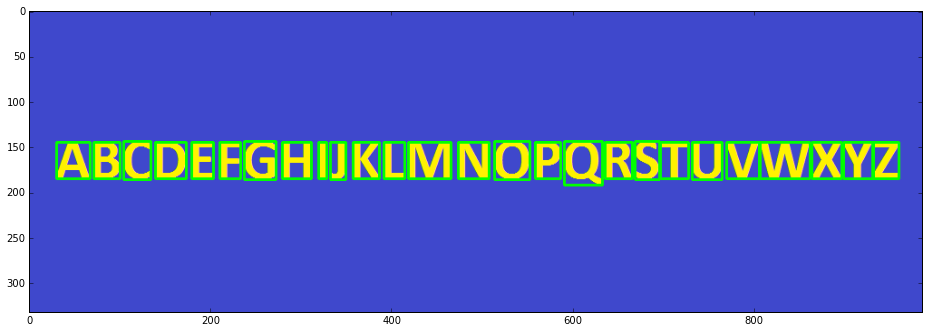

In [15]:
image_color = load_image('images/alphabet.png')
img = image_bin(image_gray(image_color))
selected_regions, letters, region_distances = select_roi(image_color.copy(), img)
print region_distances
display_image(selected_regions)
print 'Broj prepoznatih regiona:', len(letters)

In [16]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
inputs = prepare_for_ann(letters)
outputs = convert_output(alphabet)
ann = create_ann()
ann = train_ann(ann, inputs, outputs)

#Iščitavanje pune rečenice.
Prvo se učitava slika, i određuju regioni od interesa kao i rastojanje među njima. Nakon toga, određuju se centri
dve grupe rastojanja K-means algoritmom.

Broj prepoznatih regiona: 47


KMeans(copy_x=True, init='k-means++', max_iter=2000, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=1e-05,
    verbose=0)

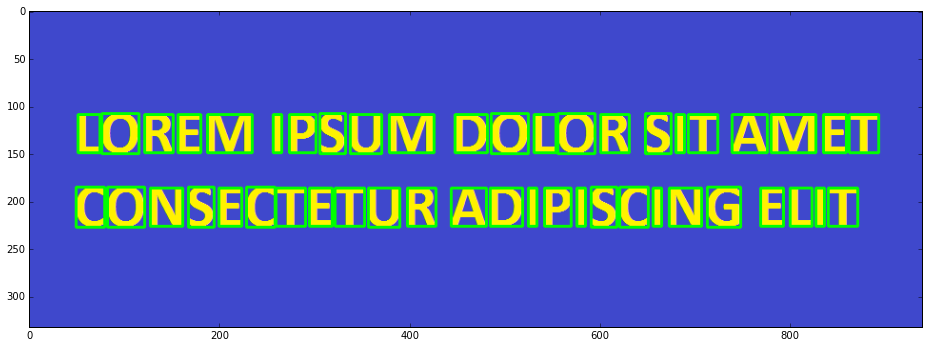

In [17]:
#Učitavanje slike i određivanje regiona od interesa
image_color = load_image('images/Dodatni.png')
img = image_bin(image_gray(image_color))
selected_regions, letters, distances = select_roi(image_color.copy(), img)
#print distances
display_image(selected_regions)
#print distances[-1][0:-1]
print 'Broj prepoznatih regiona:', len(letters)

row1 = []
row2 = []
letters1 = []
letters2 = []
#ako bi bilo tri reda, parametar za broj razdvojenih redova, za primer uzeto tri reda
#razdvojeno_redova = 0
for dist in distances: #razdvajanje redova
    if dist<0:
        #if razdvojeno_redova == 0: #samo odradis row1
        #razdvojeno_redova += 1
        row1 = distances[0:distances.index(dist)] #distances.index(dist) razdalina predstavlja razdaljinu poslednjeg slova prvog reda i prvog slova drugog reda
        row2 = distances[distances.index(dist)+1:-1] #opet, ne treba nam ta negativna razdaljina distances.index(dist)
        row2.append(distances[-1]) #poslednji distance, koji nije ubacen u prethodnom redu
        letters1 = letters[0:distances.index(dist)+1]
        letters2 = letters[distances.index(dist)+1:-1]
        letters2.append(letters[-1]) #poslednje slovo, koje nije ubaceno u prethodnom redu
    #else if razdvojeno_redova == 1: #row2 i row3 kao gore row1 i row2
        break
#print distances, '\n', row1, '    ', row2
#print len(letters1), ' ', len(letters2)
#Podešavanje centara grupa K-means algoritmom
#distances = np.array(distances[:]).reshape(len(distances), 1)
row1 = np.array(row1[:]).reshape(len(row1), 1)
row2 = np.array(row2[:]).reshape(len(row2), 1)
#print len(row1), ' ', len(row2)
#Neophodno je da u K-means algoritam bude prosleđena matrica u kojoj vrste određuju elemente
#print distances
k_means1 = KMeans(n_clusters=2, max_iter=2000, tol=0.00001, n_init=10)
k_means1.fit(row1)
k_means2 = KMeans(n_clusters=2, max_iter=2000, tol=0.00001, n_init=10)
k_means2.fit(row2)

#TODO 8
Promeniti funkciju za prikaz tako da formira string sa razmacima između reči.

In [18]:
# TODO 8
def display_result(outputs, alphabet, k_means):
    '''
    Funkcija određuje koja od grupa predstavlja razmak između reči, a koja između slova, i na osnovu
    toga formira string od elemenata pronađenih sa slike.
    Args:
        outputs: niz izlaza iz neuronske mreže.
        alphabet: niz karaktera koje je potrebno prepoznati
        kmeans: obučen kmeans objekat
    Return:
        Vraća formatiran string
    '''
    # Odrediti indeks grupe koja odgovara rastojanju između reči, pomoću vrednosti iz k_means.cluster_centers_
    w_space_group = max(enumerate(k_means.cluster_centers_), key = lambda x: x[1])[0]
    #print len(k_means.labels_)
    #print len((outputs[1:,:]))
    result = alphabet[winner(outputs[0])]
    for idx, output in enumerate(outputs[1:,:]):
        # Iterativno dodavati prepoznate elemente kao u vežbi 2, alphabet[winner(output)]
        # Dodati space karakter u slučaju da odgovarajuće rastojanje između dva slova odgovara razmaku između reči.
        # U ovu svrhu, koristiti atribut niz k_means.labels_ koji sadrži sortirana rastojanja između susednih slova.
        #print idx
        if (k_means.labels_[idx] == w_space_group):
            result += ' '
        result += alphabet[winner(output)]
        #print result
    return result

todo_8_alphabet = np.array(['a', 'b', 'c'])
todo_8_outputs = np.array([[0.8, 0.1, 0.1], [0.2, 0.8, 0], [0.1, 0.9, 0], [0.1, 0, 0.9]], np.float32)
from unittest.util import namedtuple
KMeansMock = namedtuple('KMeansMock', ['labels_', 'cluster_centers_'])
todo_8_k_means_mock = KMeansMock(labels_ = [0, 1, 0], cluster_centers_ = [1, 20])
todo_8_result = display_result(todo_8_outputs, todo_8_alphabet, todo_8_k_means_mock)
assert todo_8_result == 'ab bc', 'string "' + todo_8_result + '" nije jednak očekivanom "ab bc"'
print 'TODO 8: SUCCESS'

TODO 8: SUCCESS


#Izvršavanje predikcije

In [19]:
#dodati inputsBroj i resultsBroj i k_meansBroj za svaki red posebno
inputs1 = prepare_for_ann(letters1)
inputs2 = prepare_for_ann(letters2)
results1 = ann.predict(np.array(inputs1, np.float32))
results2 = ann.predict(np.array(inputs2, np.float32))
#results sadrzi M nizova od 26 vrednosti od 0 do 1 koje pokazuju kolika je sansa da bude slovo na tom indeksu (0 do 25) u ulaznom alfabetu
#M je broj slova u slici koja je prosledjena neuronskoj mrezi (Dodatni.jpg)
#for x in range(0, len(results)):
#    print results[x]
#k_means.labels_ ima N elemenata, gde je N broj razmaka izmedju slova i reci, 1 znaci da je razmak izmedju reci, 0 izmedju slova
#for x in range(0, len(k_means.labels_)):
#    print k_means.labels_[x]
print display_result(results1, alphabet, k_means1)
print display_result(results2, alphabet, k_means2)

LOREM IPSUM DOLOR SIT AMET
CONSECTETUR ADIPISCING ELIT


#TODO dodatno
Proširiti algoritam mogućnošću da prepoznaje redove. Primer slike za prepoznavanje je
<i>images/Dodatno.png</i>